In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, precision_score

from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Cardiovascular disease prediction.

## I. Introduction

According to World Health Organization cardiovascular disease is the number one cause of death in the world. Every year there is about $18$ million deaths because of this disease [1]. Just to show the size that is as much as the population of Romania. Deaths from heart disease are about $30\%$ of all deaths in the world. We can reduce this number by screening of the population which however would be quite expensive. There is no reason to do this for all groups of people for example young people are with lower risk than the older one so we need to recognise people in risk and to apply screening only on them.

To determine people with hight risk in this work is used $"Cardiovascular\ Disease\ dataset"$ from Kaggle [2] and will be determined this part of the population using machine learning algorithm for classification. In this work will be created classification but the idea is when patient come without heart disease but our model predict that he/she is with heart disease to include this patient into the risk group and to create more detailed examinations of his/her cardiovascular system. This will help us to take preventive measures before a cardiovascular disease occurs. This is the reason this project to be called "Cardiovascular disease prediction" not "classification".

## II. Classification model selection

### 1. Data review

First let's start with reading the dataset.

In [3]:
cardio_vascular_disease = pd.read_csv("cardio_train.csv", sep=";")

In [4]:
cardio_vascular_disease

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


We can see that dataset contains 13 features their description is taken from Kaggle [2]:

There are 3 types of input features:

    Objective: factual information;
    Examination: results of medical examination;
    Subjective: information given by the patient.

Features:

    Age | Objective Feature | age | int (days)
    Height | Objective Feature | height | int (cm) |
    Weight | Objective Feature | weight | float (kg) |
    Gender | Objective Feature | gender | categorical code |
    Systolic blood pressure | Examination Feature | ap_hi | int |
    Diastolic blood pressure | Examination Feature | ap_lo | int |
    Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
    Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
    Smoking | Subjective Feature | smoke | binary |
    Alcohol intake | Subjective Feature | alco | binary |
    Physical activity | Subjective Feature | active | binary |
    Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

First column contains $ID$ of the patient and don't affect cardiovascular disease so this column will be removed.

In [5]:
cardio_vascular_disease = cardio_vascular_disease.drop("id", axis=1)

In [6]:
cardio_vascular_disease

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


As we can see from the table above some of the columns contains values which is much bigger than values in other columns like values in $"age"$ and in $"height"$ for this reason we need to apply scaling to the features.

Before applying scaling let's keep the names of the features in new variable called $"columns\_names"$ to use it later.

In [7]:
columns_names = cardio_vascular_disease.columns

In [8]:
columns_names

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [9]:
cardio_vascular_disease = pd.DataFrame(MinMaxScaler().fit_transform(cardio_vascular_disease))

In [10]:
cardio_vascular_disease.columns = columns_names

In [11]:
cardio_vascular_disease

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0.588076,1.0,0.579487,0.273684,0.016079,0.013550,0.0,0.0,0.0,0.0,1.0,0.0
1,0.730159,0.0,0.517949,0.394737,0.017934,0.014453,1.0,0.0,0.0,0.0,1.0,1.0
2,0.624003,0.0,0.564103,0.284211,0.017316,0.012647,1.0,0.0,0.0,0.0,0.0,1.0
3,0.528455,1.0,0.584615,0.378947,0.018553,0.015357,0.0,0.0,0.0,0.0,1.0,1.0
4,0.516918,0.0,0.517949,0.242105,0.015461,0.011743,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.653659,1.0,0.579487,0.347368,0.016698,0.013550,0.0,0.0,1.0,0.0,1.0,0.0
69996,0.913899,0.0,0.528205,0.610526,0.017934,0.014453,0.5,0.5,0.0,0.0,1.0,1.0
69997,0.640186,1.0,0.656410,0.500000,0.020408,0.014453,1.0,0.0,0.0,1.0,0.0,1.0
69998,0.900736,0.0,0.553846,0.326316,0.017625,0.013550,0.0,0.5,0.0,0.0,0.0,1.0


Now let's check for missing values in the dataset.

In [12]:
cardio_vascular_disease.isna().any()

age            False
gender         False
height         False
weight         False
ap_hi          False
ap_lo          False
cholesterol    False
gluc           False
smoke          False
alco           False
active         False
cardio         False
dtype: bool

Also let's check how balanced is our dataset.

In [13]:
print("Number of patient with cardiovascular disease: ", len(cardio_vascular_disease[cardio_vascular_disease["cardio"] == 1]))
print("Number of patient without cardiovascular disease: ", len(cardio_vascular_disease[cardio_vascular_disease["cardio"] == 0]))

Number of patient with cardiovascular disease:  34979
Number of patient without cardiovascular disease:  35021


From result above we can see that we have balanced dataset.

### 2. Data handling and dimensionality reduction.

After we took a look into the data we can separate features from labels (our target variable is last column $"cardio"$).

In [14]:
cvd_attributes, cvd_labels = cardio_vascular_disease.drop("cardio", axis = 1), cardio_vascular_disease["cardio"]

In [15]:
cvd_attributes

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0.588076,1.0,0.579487,0.273684,0.016079,0.013550,0.0,0.0,0.0,0.0,1.0
1,0.730159,0.0,0.517949,0.394737,0.017934,0.014453,1.0,0.0,0.0,0.0,1.0
2,0.624003,0.0,0.564103,0.284211,0.017316,0.012647,1.0,0.0,0.0,0.0,0.0
3,0.528455,1.0,0.584615,0.378947,0.018553,0.015357,0.0,0.0,0.0,0.0,1.0
4,0.516918,0.0,0.517949,0.242105,0.015461,0.011743,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
69995,0.653659,1.0,0.579487,0.347368,0.016698,0.013550,0.0,0.0,1.0,0.0,1.0
69996,0.913899,0.0,0.528205,0.610526,0.017934,0.014453,0.5,0.5,0.0,0.0,1.0
69997,0.640186,1.0,0.656410,0.500000,0.020408,0.014453,1.0,0.0,0.0,1.0,0.0
69998,0.900736,0.0,0.553846,0.326316,0.017625,0.013550,0.0,0.5,0.0,0.0,0.0


In [16]:
cvd_labels

0        0.0
1        1.0
2        1.0
3        1.0
4        0.0
        ... 
69995    0.0
69996    1.0
69997    1.0
69998    1.0
69999    0.0
Name: cardio, Length: 70000, dtype: float64

Before moving to classification model selection let's try to reduce number of features using principal component analysis.

In [17]:
pca = PCA()

In [18]:
cvd_attributes_reduced = pca.fit_transform(cvd_attributes)

In [19]:
np.cumsum(pca.explained_variance_ratio_)

array([0.32223567, 0.53048391, 0.72429477, 0.82456543, 0.8927556 ,
       0.94435461, 0.99059244, 0.99791302, 0.99949939, 0.9998806 ,
       1.        ])

We can see that after applying $PCA$ seven columns contains $99\%$ of the information and we will use only these columns.

In [20]:
cvd_attributes_reduced = cvd_attributes_reduced[:, :7]

In [21]:
pd.DataFrame(cvd_attributes_reduced)

,0,1,2,3,4,5,6
0,0.603277,-0.154441,-0.216954,-0.290689,-0.000109,0.023873,0.070737
1,-0.396144,-0.258451,0.572924,0.002884,-0.548403,-0.039383,0.050745
2,-0.419298,0.737277,0.637579,0.048850,-0.550128,-0.032815,0.163451
3,0.606998,-0.154176,-0.219360,-0.287314,0.004275,0.026872,0.128436
4,-0.371486,0.809848,-0.189499,0.059973,0.015062,-0.004480,0.138550
...,...,...,...,...,...,...,...
69995,0.885615,-0.180458,-0.161547,0.521498,0.048339,-0.473782,-0.036108
69996,-0.384299,-0.238487,0.470469,-0.042286,0.126112,-0.023305,-0.202411
69997,0.659479,0.745963,0.733313,0.219112,-0.571999,0.870161,0.099772
69998,-0.389536,0.793103,0.131061,0.000501,0.395736,-0.008704,-0.245097


After reducing number of features let's move to splitting the data. In the dataset there is $70\ 000$ instances so we will use $85\%$ of them for training and there will be $10\ 500$ for testing which is enough.

In [22]:
cvd_attributes_reduced_train, cvd_attributes_reduced_test, cvd_labels_reduced_train, cvd_labels_reduced_test = train_test_split(cvd_attributes_reduced,
                                                                                                                                cvd_labels,
                                                                                                                                train_size = 0.85,
                                                                                                                                shuffle = True)

Now let's check the shape of training and testing set just to be sure that the data is splitted right.

In [23]:
print("Shape of training set of attributes:", cvd_attributes_reduced_train.shape)
print("Shape of training set of labels:", cvd_labels_reduced_train.shape)
print("Shape of testing set of attributes:", cvd_attributes_reduced_test.shape)
print("Shape of testing set of labels:", cvd_labels_reduced_test.shape)

Shape of training set of attributes: (59500, 7)
Shape of training set of labels: (59500,)
Shape of testing set of attributes: (10500, 7)
Shape of testing set of labels: (10500,)


### 3. Model selection

In this part we will create classification using different algorithms ($LogisticRegression$, $DecisionTreeClassifier$, $AdaBoostClassifier$, and $RandomForestClassifier$) after that will analyze results from each of them and will select the best one. To select hyperparameters we will use $GridSearchCV$ with $5-fold\ CrossValidation$ in this way there will be $11\ 900$ for the validation set. It is good idea to use $Cross\ Validation$ here because it is possible to have much better score for training set than for testing so when we analyse the results for us will be interesting not only scoring result but also standart deviation of the scores for different validation sets. To be sure that our model will predict correctly as much as possible patients with cardiovascular disease we will use $recall$ metrics to evaluate the model.

#### 3.1 Model training

First let's create classiffication using $LogisticRegression$ algorithm. Below are presented the values for hyperparameters which will be used for $GridSearch$ also as solver will be used $"sag"$ because the dataset is large and this solver is faster than others.

In [24]:
parameters_lr = {
    "C": [1e-6, 1e-3, 1, 1e3, 1e6, 1e9],
    "max_iter": [5, 10, 50, 100],
    "fit_intercept": [True, False]
}

In [25]:
def grid_search(algorithm, parameters, attributes, labels):
    grid_search_results = GridSearchCV(algorithm, parameters, cv = 5, scoring = "recall")
    grid_search_results.fit(attributes, labels)
    return grid_search_results

In [26]:
grid_search_reduced_lr = grid_search(LogisticRegression(solver = "sag"), parameters_lr, cvd_attributes_reduced_train, cvd_labels_reduced_train)

C:\Programi\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Programi\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Programi\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Programi\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Programi\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

C:\Programi\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Programi\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Programi\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Programi\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Programi\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

C:\Programi\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Programi\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Programi\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Programi\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Programi\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

C:\Programi\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [27]:
grid_search_reduced_lr.best_score_

0.6727242133602558

In [28]:
grid_search_reduced_lr.best_estimator_

LogisticRegression(C=1000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=5, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
grid_search_reduced_lr.cv_results_

{'mean_fit_time': array([0.15631499, 0.27876806, 0.38930187, 0.23623281, 0.09100146,
        0.13279862, 0.1327477 , 0.12832012, 0.06195388, 0.12512288,
        0.20274024, 0.20271416, 0.05670295, 0.11623669, 0.15282941,
        0.12186832, 0.05832419, 0.10941706, 0.29052653, 0.26111102,
        0.05872502, 0.11981711, 0.21240845, 0.21391311, 0.060746  ,
        0.12913852, 0.35391898, 0.33449416, 0.06879196, 0.10499077,
        0.31076789, 0.38420215, 0.06516976, 0.11375046, 0.44457808,
        0.42487578, 0.09299102, 0.16220155, 0.3859551 , 0.39207263,
        0.08700047, 0.17107472, 0.52601738, 0.45575361, 0.08388162,
        0.1759974 , 0.40406127, 0.41801195]),
 'std_fit_time': array([0.01836205, 0.00970846, 0.04458076, 0.06450193, 0.01688799,
        0.01850213, 0.00957636, 0.02312395, 0.01313204, 0.02427586,
        0.01905442, 0.02278876, 0.00777603, 0.02033203, 0.01342489,
        0.01627405, 0.00865813, 0.01291689, 0.03278005, 0.02077842,
        0.01153085, 0.0205963 , 0.015

If we run $GridSearchCV$ several times we will see that sometimes best estimator is when $"C"$ have value equal to $0.000001\ (1e-6)$ and recall score is equal to $1$ or is equal to value close to $1$ which is strange because this means that with stronger regularization (algorithm doesn't care too much about the data) we have better results but other times algorithm return very low value for recall score with this value for $C$ which can be seen from $cv\_results\_$. So we can think that the algorithm overfit the data when the recall score is high and predict everything as positive and underfit when is low and predict everything as negative so here we can use also precision score not as main metric to compare results from different algorithms but only to check is the algorithm predict everything as positive or as negative. If precision score is equal to approximately $0.5$ (because the dataset is balanced as we noticed above) this means that the algorithm predict everything as positive. When recall score is very low or equal to $0$ precision score must be also very low or equal to $0$ which means that the algorithm predict everything as negative.

In [30]:
precision_score(cvd_labels_reduced_train, grid_search_reduced_lr.predict(cvd_attributes_reduced_train), average="binary", pos_label=1)

0.69279612971502

From the obtained result we can draw a conclusion about quality of the prediction for this model with these hyperparameters. Other way is just to show the results from confusion matrix and to see number of $True\ Negative$, $Flalse\ Possitive$, $Flalse\ Negative$ and $True\ Possitive$ predictions.

In [31]:
tn, fp, fn, tp = confusion_matrix(cvd_labels_reduced_train, grid_search_reduced_lr.predict(cvd_attributes_reduced_train)).ravel()
print("True negative predictions: ", tn)
print("False positive predictions: ", fp)
print("False negative predictions: ", fn)
print("True positive predictions: ", tp)

True negative predictions:  25721
False positive predictions:  4064
False negative predictions:  20550
True positive predictions:  9165


$\textit{Note: If you restart kernel and run again all cells in this work it is possible best recall score to be with values for C different than 1e-6 and then precision score will give you different than 0.5 result and also confusion matrix will return different values.}$

This makes algorithm unstable in his predictions so we need to run another $GridSearch$ with same values for $C$ without $1e-6$ and result from this will be our best estimator for $Logistic\ Regression$ algorithm. To do this first let's override $parameters\_lr$.

In [32]:
parameters_lr = {
    "C": [1e-3, 1, 1e3, 1e6, 1e9],
    "max_iter": [5, 10, 50, 100],
    "fit_intercept": [True, False]
}

In [33]:
grid_search_reduced_lr = grid_search(LogisticRegression(solver = "sag"), parameters_lr, cvd_attributes_reduced_train, cvd_labels_reduced_train)

C:\Programi\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Programi\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Programi\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Programi\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Programi\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

C:\Programi\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Programi\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Programi\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Programi\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Programi\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

C:\Programi\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Programi\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Programi\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Programi\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Programi\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

In [34]:
grid_search_reduced_lr.best_score_

0.681238431768467

In [35]:
grid_search_reduced_lr.best_estimator_

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

Now let's apply $GridSearch$ for other algorithms which were mentioned above. Hyperparameters which are used are defined below.

In [36]:
parameters_dtc = {
    "max_depth": [1, 10, 50, 100],
    "max_leaf_nodes": [5, 10, 50],
    "min_samples_leaf": [1, 5, 10, 50]
}

parameters_ada = {
    "n_estimators": [10, 50, 100, 500]
}

parameters_rfc = {
    "max_depth": [10, 50, 100],
    "n_estimators": [10, 50, 100, 300]
}

After defining hyperparameters we can already run $Grid\ Search$ with them for different algorithms which will take about 20 minutes.

In [37]:
grid_search_reduced_dtc = grid_search(DecisionTreeClassifier(), parameters_dtc, cvd_attributes_reduced_train, cvd_labels_reduced_train)
grid_search_reduced_ada = grid_search(AdaBoostClassifier(), parameters_ada, cvd_attributes_reduced_train, cvd_labels_reduced_train)
grid_search_reduced_rfc = grid_search(RandomForestClassifier(), parameters_rfc, cvd_attributes_reduced_train, cvd_labels_reduced_train)

After training the algorithms we will move to analysing the results from $Grid\ Search$ and selection of model.

#### 3.2 Result analysis and model selection

Earlier was said that the main metrics will be $recall$ but to decide which algorithm to use we will be interested also from $std\_test\_score$ from $Grid\ Search$ results because this will tell us how stable is the algorithm in his predictions, mean time which takes to fit algorithm with current hyperparameters and $predict\_proba$ values for testing dataset because if they are around $0.5$ this means that this algorithm is not so sure in his predictions.

$predict\_proba$ will give us for each instance probability for each class. In this case there is only two classes ($"0"$ - without cardiovascular disease and $"1"$ - with cardiovascular disease) so we can take probabilities only for class $"0"$. In this way probability less than $0.5$ means that the algorithm will predict class $1$ and vice versa

To be more visiable and easy to analyse we can put $best\ score$, $standart\ deviation\ for\ best\ score$, $mean\ time$ and part of instances for which prediction probability is between $40\%$ and $60\%$ because in this area algorithm is not so sure in his predictions.

First we need to find and save position of best estimators for every algorithm.

In [38]:
lr_reduced_best_score_index = np.where(grid_search_reduced_lr.cv_results_["rank_test_score"] == 1)[0][0]
dtc_reduced_best_score_index = np.where(grid_search_reduced_dtc.cv_results_["rank_test_score"] == 1)[0][0]
ada_reduced_best_score_index = np.where(grid_search_reduced_ada.cv_results_["rank_test_score"] == 1)[0][0]
rfc_reduced_best_score_index = np.where(grid_search_reduced_rfc.cv_results_["rank_test_score"] == 1)[0][0]

After that we can save all $best\ scores$, $standart\ deviations$ and $mean\ times$ in separate lists.

In [39]:
best_scores_reduced = [grid_search_reduced_lr.best_score_, 
                       grid_search_reduced_dtc.best_score_,
                       grid_search_reduced_ada.best_score_, 
                       grid_search_reduced_rfc.best_score_]

In [40]:
std_scores_reduced = [grid_search_reduced_lr.cv_results_["std_test_score"][lr_reduced_best_score_index], 
                      grid_search_reduced_dtc.cv_results_["std_test_score"][dtc_reduced_best_score_index], 
                      grid_search_reduced_ada.cv_results_["std_test_score"][ada_reduced_best_score_index], 
                      grid_search_reduced_rfc.cv_results_["std_test_score"][rfc_reduced_best_score_index]]

In [41]:
mean_time_reduced = [grid_search_reduced_lr.cv_results_["mean_fit_time"][lr_reduced_best_score_index], 
                     grid_search_reduced_dtc.cv_results_["mean_fit_time"][dtc_reduced_best_score_index], 
                     grid_search_reduced_ada.cv_results_["mean_fit_time"][ada_reduced_best_score_index], 
                     grid_search_reduced_rfc.cv_results_["mean_fit_time"][rfc_reduced_best_score_index]]

To find number of instances for which prediction probability is between $40\%$ and $60\%$ first we need to define limit conditions then to count them and to save them in list.

In [42]:
lower_limit_condition_lr_reduced = grid_search_reduced_lr.predict_proba(cvd_attributes_reduced_train)[:, :1] > 0.4
upper_limit_condition_lr_reduced = grid_search_reduced_lr.predict_proba(cvd_attributes_reduced_train)[:, :1] < 0.6

lower_limit_condition_dtc_reduced = grid_search_reduced_dtc.predict_proba(cvd_attributes_reduced_train)[:, :1] > 0.4
upper_limit_condition_dtc_reduced = grid_search_reduced_dtc.predict_proba(cvd_attributes_reduced_train)[:, :1] < 0.6

lower_limit_condition_ada_reduced = grid_search_reduced_ada.predict_proba(cvd_attributes_reduced_train)[:, :1] > 0.4
upper_limit_condition_ada_reduced = grid_search_reduced_ada.predict_proba(cvd_attributes_reduced_train)[:, :1] < 0.6

lower_limit_condition_rfc_reduced = grid_search_reduced_rfc.predict_proba(cvd_attributes_reduced_train)[:, :1] > 0.4
upper_limit_condition_rfc_reduced = grid_search_reduced_rfc.predict_proba(cvd_attributes_reduced_train)[:, :1] < 0.6

In [43]:
part_40_60_reduced = [round(len(grid_search_reduced_lr.predict_proba(cvd_attributes_reduced_train)[:, :1][lower_limit_condition_lr_reduced & upper_limit_condition_lr_reduced]) * 100 / len(grid_search_reduced_lr.predict_proba(cvd_attributes_reduced_train)[:, :1]), 2),
                     round(len(grid_search_reduced_dtc.predict_proba(cvd_attributes_reduced_train)[:, :1][lower_limit_condition_dtc_reduced & upper_limit_condition_dtc_reduced]) * 100 / len(grid_search_reduced_dtc.predict_proba(cvd_attributes_reduced_train)[:, :1]), 2),
                     round(len(grid_search_reduced_ada.predict_proba(cvd_attributes_reduced_train)[:, :1][lower_limit_condition_ada_reduced & upper_limit_condition_ada_reduced]) * 100 / len(grid_search_reduced_ada.predict_proba(cvd_attributes_reduced_train)[:, :1]), 2),
                     round(len(grid_search_reduced_rfc.predict_proba(cvd_attributes_reduced_train)[:, :1][lower_limit_condition_rfc_reduced & upper_limit_condition_rfc_reduced]) * 100 / len(grid_search_reduced_rfc.predict_proba(cvd_attributes_reduced_train)[:, :1]), 2)]

Also the names of the algorithms which is used can be saved in list.

In [44]:
algorithms = ["Logistic Regression", "Decision Tree Classifier", "AdaBoost", "Random Forest Classifier"]

And now we are ready to create table as pandas dataframe and show it.

In [45]:
evaluation_table_reduced = pd.DataFrame([algorithms, best_scores_reduced, std_scores_reduced, mean_time_reduced, part_40_60_reduced]).T
evaluation_table_reduced.columns = ["Algorithm", "Best score", "Standart deviation best score", "Mean time for fitting [s]", "Part between 40% and 60% [%]"]

In [46]:
evaluation_table_reduced

,Algorithm,Best score,Standart deviation best score,Mean time for fitting [s],Part between 40% and 60% [%]
0,Logistic Regression,0.681238,0.170936,0.0979803,80.91
1,Decision Tree Classifier,0.649739,0.0387125,0.329963,51.84
2,AdaBoost,0.605351,0.00893715,34.4601,100
3,Random Forest Classifier,0.608514,0.010294,4.47144,44.48


From results in table it is obvious that $AdaBoost Classifier$ have almost the same score as the others but all of the predictions are with probability between $40\%$ and $60\%$ which means that this algorithm is not very sure in his predictions. For other algorithms almost the half of the instances are in this area also they have similar best score results but for $RandomForestClassifier$  mean time is much bigger than for the others. To be more presentative let's plot a histogram with predictions probability for each algorithm. Also on the histograms there are red lines which present the area between $40\%$ and $60\%$.

$\textit{Note: Prediction probability here is for class "0", for class "1" in our case this probability is 1 - prediction probability for "0" because we have only two classes.}$

In [47]:
trained_algorithms_reduced = [grid_search_reduced_lr, 
                              grid_search_reduced_dtc, 
                              grid_search_reduced_ada, 
                              grid_search_reduced_rfc]

In [48]:
def prediction_probability_plot(algorithms, attributes):
    plt.figure(figsize=[11, 7])
    plt.hist(algorithms[0].predict_proba(attributes)[:, :1], bins="fd", color="blue", range=(0, 1))
    plt.title("Logistic Regression")
    plt.xlabel("Prediction probability for class '0'")
    plt.ylabel("Number of instances with current prediction probability")
    plt.axvline(x = 0.4, color="red")
    plt.axvline(x = 0.6, color="red")
    plt.show()
    plt.figure(figsize=[11, 7])
    plt.hist(algorithms[1].predict_proba(attributes)[:, :1], bins="fd", color="green", range=(0, 1))
    plt.title("Decision tree classifier")
    plt.xlabel("Prediction probability for class '0'")
    plt.ylabel("Number of instances with current prediction probability")
    plt.axvline(x = 0.4, color="red")
    plt.axvline(x = 0.6, color="red")
    plt.show()
    plt.figure(figsize=[11, 7])
    plt.hist(algorithms[2].predict_proba(attributes)[:, :1], bins="fd", color="purple", range=(0, 1))
    plt.title("AdaBoost")
    plt.xlabel("Prediction probability for class '0'")
    plt.ylabel("Number of instances with current prediction probability")
    plt.axvline(x = 0.4, color="red")
    plt.axvline(x = 0.6, color="red")
    plt.show()
    plt.figure(figsize=[11, 7])
    plt.hist(algorithms[3].predict_proba(attributes)[:, :1], bins="fd", color="orange", range=(0, 1))
    plt.title("Random Forest Classifier")
    plt.xlabel("Prediction probability for class '0'")
    plt.ylabel("Number of instances with current prediction probability")
    plt.axvline(x = 0.4, color="red")
    plt.axvline(x = 0.6, color="red")
    plt.show()

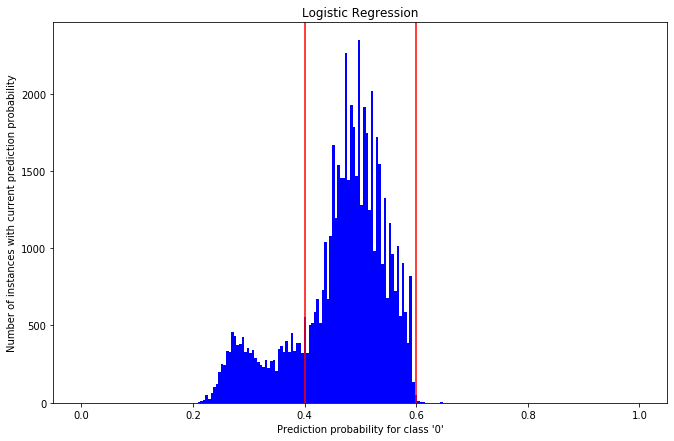

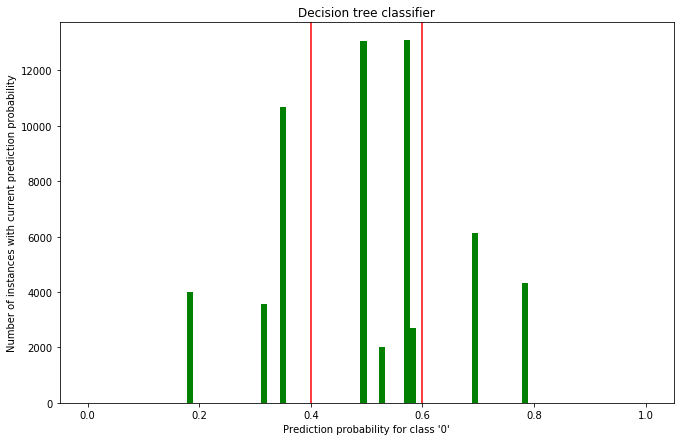

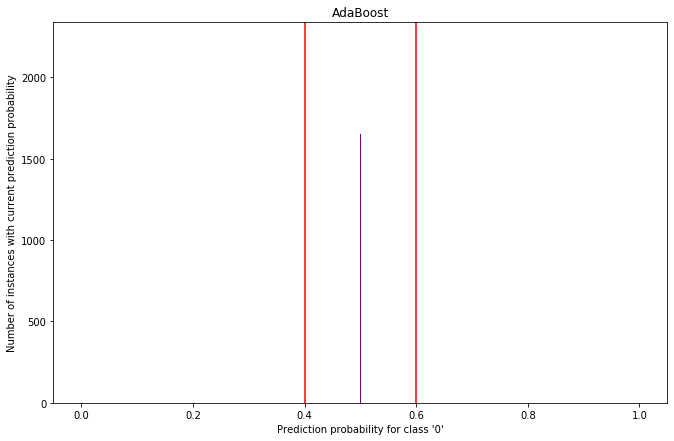

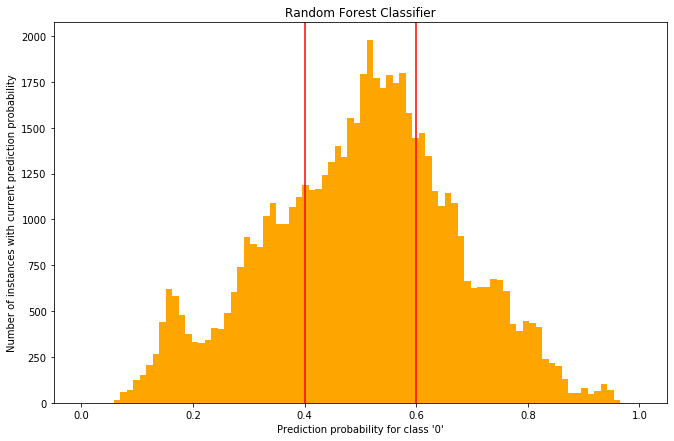

In [49]:
prediction_probability_plot(trained_algorithms_reduced, cvd_attributes_reduced_train)

From presented plots above we can see that there is a peak and he is in area between $40\%$ and $60\%$. Best scores for algorithms are better than random prediction but for most of the predictions the models are not sure.

Just because for me it is interesting what will be the result let's train these models with same set of hyperparameters but on dataset before applying principal component analysis than show same table like this above and plot same histograms.

In [50]:
cvd_attributes_train, cvd_attributes_test, cvd_labels_train, cvd_labels_test = train_test_split(cvd_attributes,
                                                                                                cvd_labels,
                                                                                                train_size = 0.85,
                                                                                                shuffle = True)

In [51]:
grid_search_lr = grid_search(LogisticRegression(solver="sag"), parameters_lr, cvd_attributes_train, cvd_labels_train)
grid_search_dtc = grid_search(DecisionTreeClassifier(), parameters_dtc, cvd_attributes_train, cvd_labels_train)
grid_search_ada = grid_search(AdaBoostClassifier(), parameters_ada, cvd_attributes_train, cvd_labels_train)
grid_search_rfc = grid_search(RandomForestClassifier(), parameters_rfc, cvd_attributes_train, cvd_labels_train)

C:\Programi\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Programi\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Programi\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Programi\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Programi\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

C:\Programi\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Programi\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Programi\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Programi\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Programi\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

C:\Programi\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Programi\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Programi\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Programi\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Programi\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

C:\Programi\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Programi\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Programi\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Programi\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Programi\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

In [52]:
lr_best_score_index = np.where(grid_search_lr.cv_results_["rank_test_score"] == 1)[0][0]
dtc_best_score_index = np.where(grid_search_dtc.cv_results_["rank_test_score"] == 1)[0][0]
ada_best_score_index = np.where(grid_search_ada.cv_results_["rank_test_score"] == 1)[0][0]
rfc_best_score_index = np.where(grid_search_rfc.cv_results_["rank_test_score"] == 1)[0][0]

In [53]:
best_scores = [grid_search_lr.best_score_, 
               grid_search_dtc.best_score_,
               grid_search_ada.best_score_, 
               grid_search_rfc.best_score_]

In [54]:
std_scores = [grid_search_lr.cv_results_["std_test_score"][lr_best_score_index], 
              grid_search_dtc.cv_results_["std_test_score"][dtc_best_score_index], 
              grid_search_ada.cv_results_["std_test_score"][ada_best_score_index], 
              grid_search_rfc.cv_results_["std_test_score"][rfc_best_score_index]]

In [55]:
mean_time = [grid_search_lr.cv_results_["mean_fit_time"][lr_best_score_index], 
             grid_search_dtc.cv_results_["mean_fit_time"][dtc_best_score_index], 
             grid_search_ada.cv_results_["mean_fit_time"][ada_best_score_index], 
             grid_search_rfc.cv_results_["mean_fit_time"][rfc_best_score_index]]

In [56]:
lower_limit_condition_lr = grid_search_lr.predict_proba(cvd_attributes_train)[:, :1] > 0.4
upper_limit_condition_lr = grid_search_lr.predict_proba(cvd_attributes_train)[:, :1] < 0.6

lower_limit_condition_dtc = grid_search_dtc.predict_proba(cvd_attributes_train)[:, :1] > 0.4
upper_limit_condition_dtc = grid_search_dtc.predict_proba(cvd_attributes_train)[:, :1] < 0.6

lower_limit_condition_ada = grid_search_ada.predict_proba(cvd_attributes_train)[:, :1] > 0.4
upper_limit_condition_ada = grid_search_ada.predict_proba(cvd_attributes_train)[:, :1] < 0.6

lower_limit_condition_rfc = grid_search_rfc.predict_proba(cvd_attributes_train)[:, :1] > 0.4
upper_limit_condition_rfc = grid_search_rfc.predict_proba(cvd_attributes_train)[:, :1] < 0.6

In [57]:
part_40_60 = [round(len(grid_search_lr.predict_proba(cvd_attributes_train)[:, :1][lower_limit_condition_lr & upper_limit_condition_lr]) * 100 / len(grid_search_lr.predict_proba(cvd_attributes_train)[:, :1]), 2), 
              round(len(grid_search_dtc.predict_proba(cvd_attributes_train)[:, :1][lower_limit_condition_dtc & upper_limit_condition_dtc]) * 100 / len(grid_search_dtc.predict_proba(cvd_attributes_train)[:, :1]), 2),
              round(len(grid_search_ada.predict_proba(cvd_attributes_train)[:, :1][lower_limit_condition_ada & upper_limit_condition_ada]) * 100 / len(grid_search_ada.predict_proba(cvd_attributes_train)[:, :1]), 2),
              round(len(grid_search_rfc.predict_proba(cvd_attributes_train)[:, :1][lower_limit_condition_rfc & upper_limit_condition_rfc]) * 100 / len(grid_search_rfc.predict_proba(cvd_attributes_train)[:, :1]), 2)]

In [58]:
evaluation_table = pd.DataFrame([algorithms, best_scores, std_scores, mean_time, part_40_60]).T
evaluation_table.columns = ["Algorithm", "Best score", "Standart deviation best score", "Mean time for fitting [s]", "Part between 40% and 60% [%]"]

In [59]:
evaluation_table

,Algorithm,Best score,Standart deviation best score,Mean time for fitting [s],Part between 40% and 60% [%]
0,Logistic Regression,0.70686,0.0422604,0.112978,41.5
1,Decision Tree Classifier,0.731645,0.00755952,0.0700724,17.6
2,AdaBoost,0.659972,0.00593993,3.42219,100
3,Random Forest Classifier,0.705145,0.00347115,20.0902,0.09


In [60]:
trained_algorithms = [grid_search_lr, grid_search_dtc, grid_search_ada, grid_search_rfc]

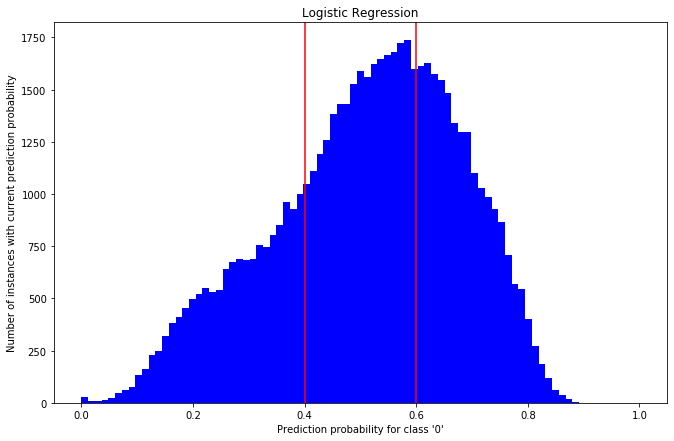

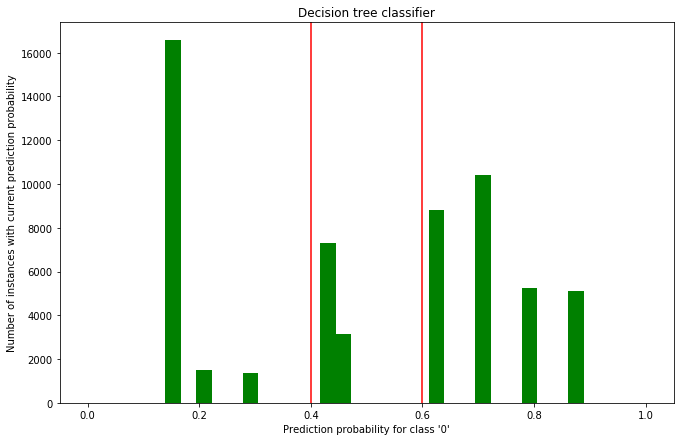

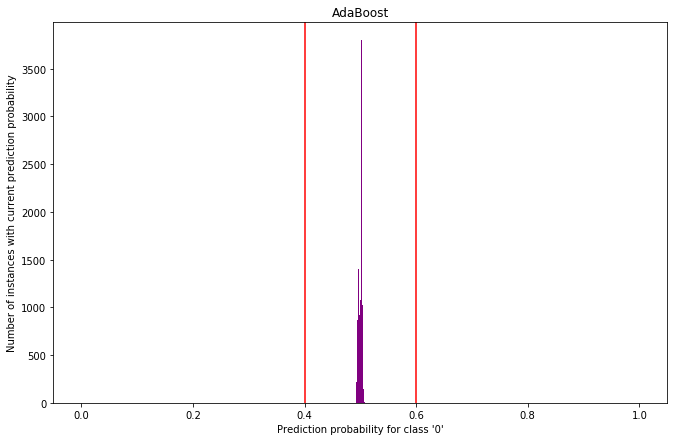

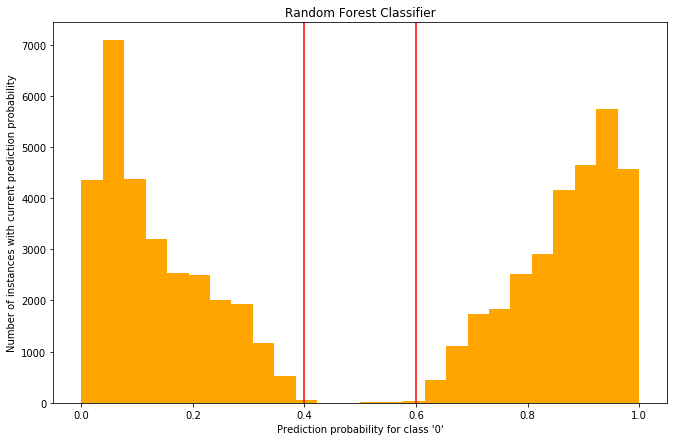

In [61]:
prediction_probability_plot(trained_algorithms, cvd_attributes_train)

From results presented in table we can see that best score for $RandomForestClassifier$ algorithm is the same as the best score for the other algorithms but instances with prediction probability in area between $40\%$ and $60\%$ is lower also standart deviation is low which means that this algorithm is stable in his predictions but it is slower. From histograms we can see that most of the prediction probabilities are near to 0 or 1 which means that the algorithm is more sure for his predictions than the others.

Now let's see what is the results from $Cross\ Validation$ for this algorithm

In [62]:
grid_search_rfc.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=100, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [63]:
grid_search_rfc.cv_results_

{'mean_fit_time': array([ 0.32721705,  1.51866231,  3.19208412,  9.47415099,  0.73997064,
         3.15002856,  6.43239574, 19.91801205,  0.64903784,  3.152847  ,
         6.48395185, 20.09017134]),
 'std_fit_time': array([0.01291217, 0.02094221, 0.22343713, 0.54658446, 0.13085651,
        0.05843468, 0.21827888, 0.65328598, 0.01589126, 0.05106074,
        0.20657576, 0.61649398]),
 'mean_score_time': array([0.02392683, 0.0887589 , 0.21598158, 0.52153807, 0.0589673 ,
        0.20910344, 0.41171293, 1.27995501, 0.04699702, 0.20742731,
        0.41029797, 1.37710271]),
 'std_score_time': array([0.00389358, 0.00199121, 0.08203595, 0.01434753, 0.01836917,
        0.00915879, 0.01455461, 0.13106784, 0.00244242, 0.00454724,
        0.02918444, 0.17038151]),
 'param_max_depth': masked_array(data=[10, 10, 10, 10, 50, 50, 50, 50, 100, 100, 100, 100],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?

We can see that best estimator is with highest values for $max\_depth$ and for $n\_estimators$ but for lower values results are similar also we can see that with lower values for $max\_depth$ and for $n\_estimators$ mean fit time is lower. Now let's run a loop and plot prediction probabilities for each combination of hyperparameters and than based on this decide what will be the hyperparameters which will be used. If results are similar it is better to select hyperparameters with the lower mean fit time.

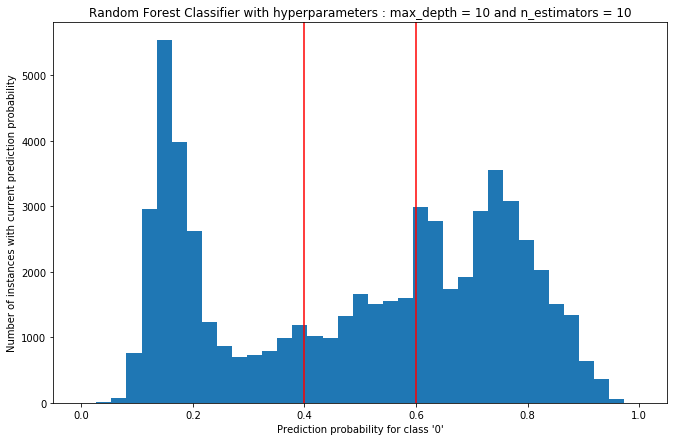

Part of instances with prediction probability between 40% and 60% : 17.18 %
Mean fit time:  0.0 s
------------------------------------------------------------------------------------------------------------


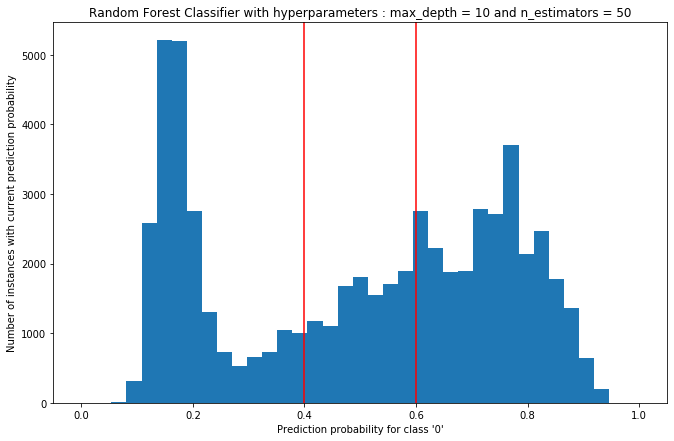

Part of instances with prediction probability between 40% and 60% : 19.46 %
Mean fit time:  2.0 s
------------------------------------------------------------------------------------------------------------


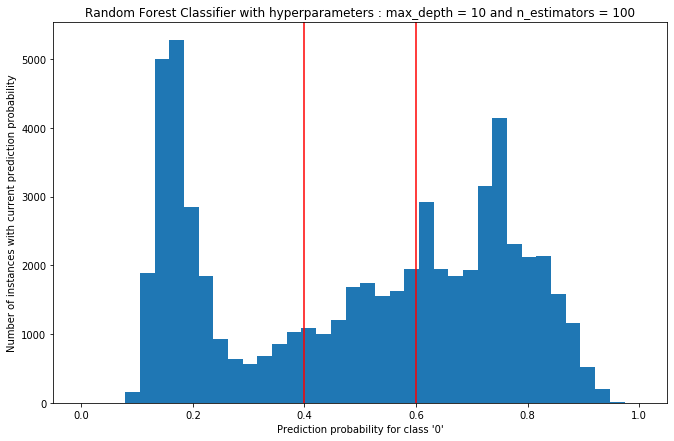

Part of instances with prediction probability between 40% and 60% : 18.63 %
Mean fit time:  3.0 s
------------------------------------------------------------------------------------------------------------


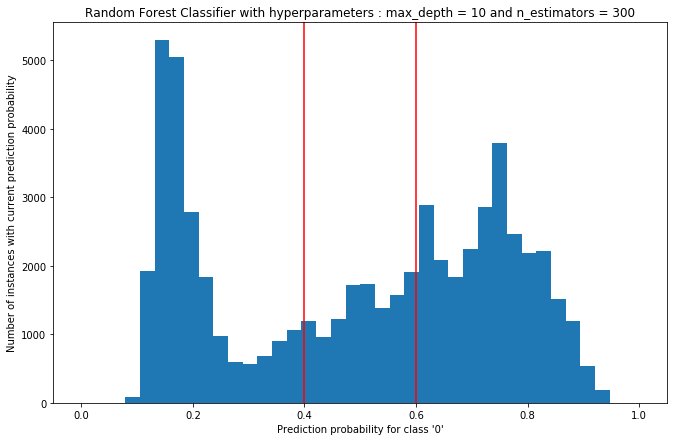

Part of instances with prediction probability between 40% and 60% : 18.44 %
Mean fit time:  9.0 s
------------------------------------------------------------------------------------------------------------


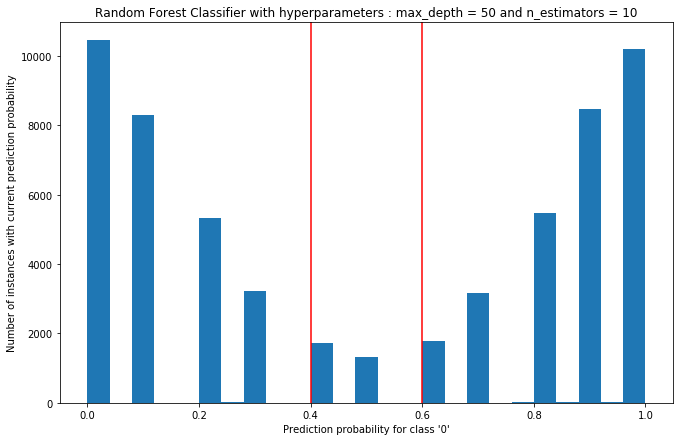

Part of instances with prediction probability between 40% and 60% : 2.24 %
Mean fit time:  1.0 s
------------------------------------------------------------------------------------------------------------


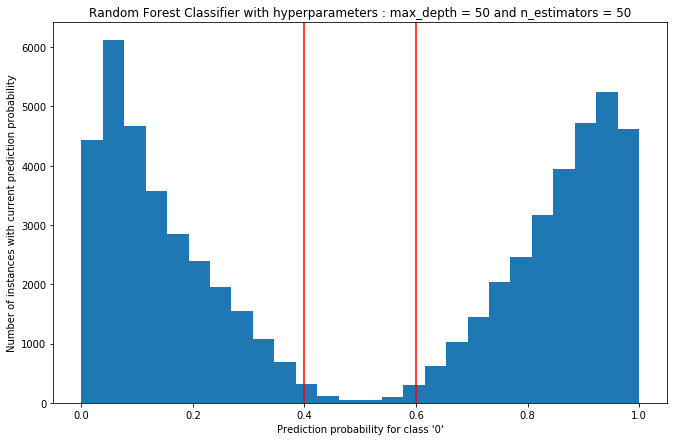

Part of instances with prediction probability between 40% and 60% : 0.94 %
Mean fit time:  3.0 s
------------------------------------------------------------------------------------------------------------


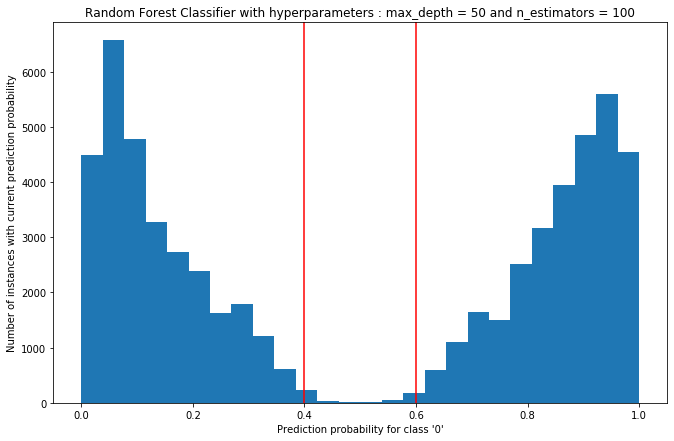

Part of instances with prediction probability between 40% and 60% : 0.43 %
Mean fit time:  7.0 s
------------------------------------------------------------------------------------------------------------


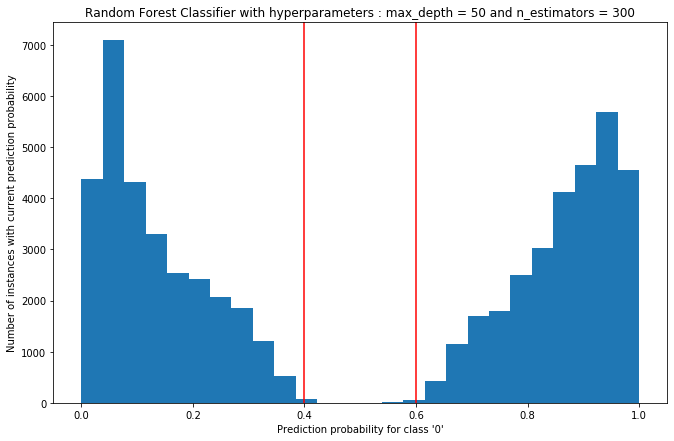

Part of instances with prediction probability between 40% and 60% : 0.11 %
Mean fit time:  21.0 s
------------------------------------------------------------------------------------------------------------


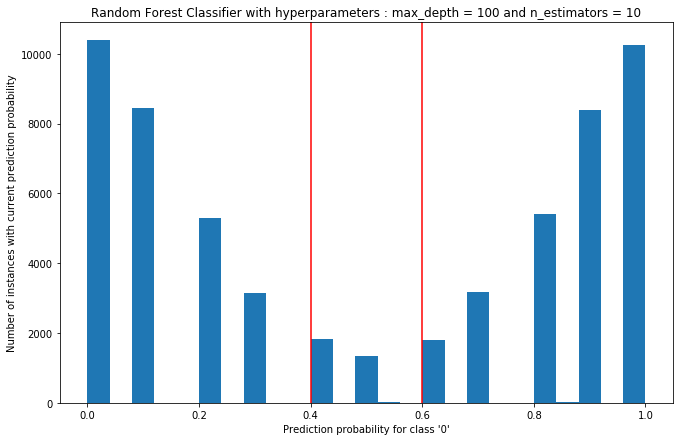

Part of instances with prediction probability between 40% and 60% : 2.29 %
Mean fit time:  1.0 s
------------------------------------------------------------------------------------------------------------


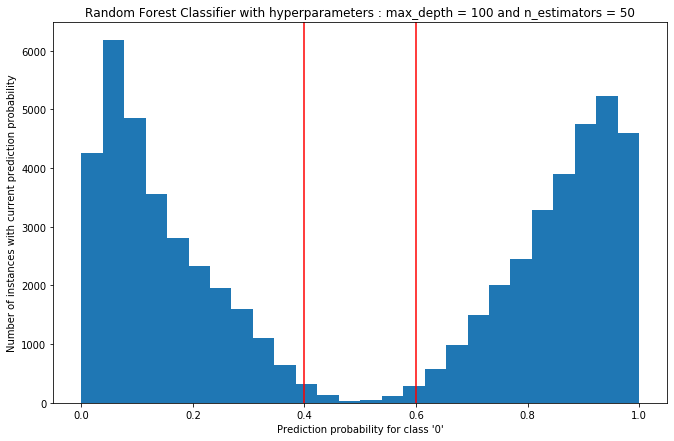

Part of instances with prediction probability between 40% and 60% : 0.96 %
Mean fit time:  3.0 s
------------------------------------------------------------------------------------------------------------


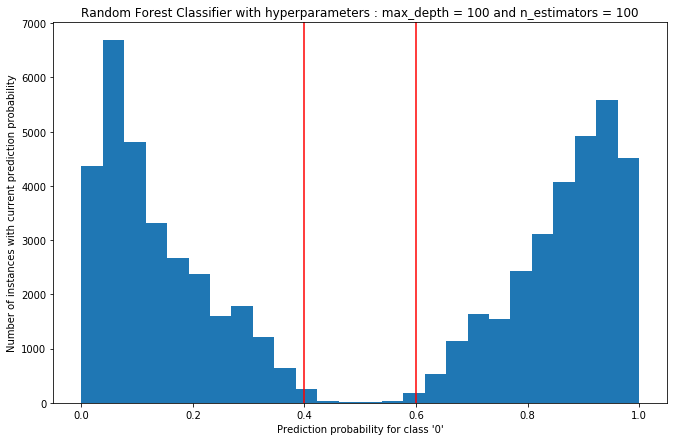

Part of instances with prediction probability between 40% and 60% : 0.38 %
Mean fit time:  7.0 s
------------------------------------------------------------------------------------------------------------


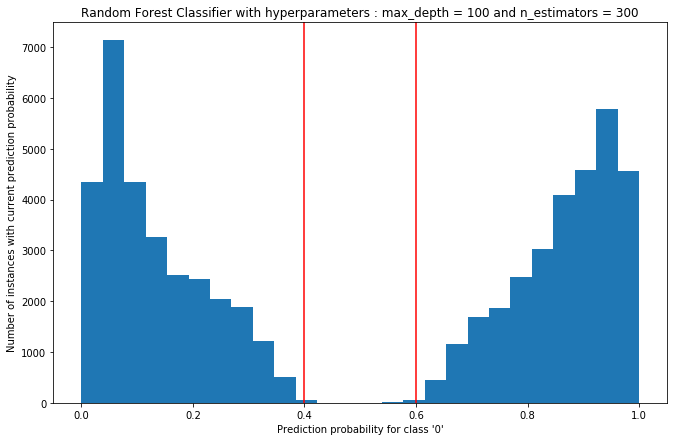

Part of instances with prediction probability between 40% and 60% : 0.09 %
Mean fit time:  21.0 s
------------------------------------------------------------------------------------------------------------


In [64]:
for max_depth in [10, 50, 100]:
    for n_estimators in [10, 50, 100, 300]:
        parameters = {
            "max_depth": [max_depth],
            "n_estimators": [n_estimators]
        }
        rfc_improvement = grid_search(RandomForestClassifier(), parameters, cvd_attributes_train, cvd_labels_train)
        
        plt.figure(figsize=[11, 7])
        plt.hist(rfc_improvement.predict_proba(cvd_attributes_train)[:, :1], bins="fd", range=(0, 1))
        plt.title(f"Random Forest Classifier with hyperparameters : max_depth = {max_depth} and n_estimators = {n_estimators}")
        plt.xlabel("Prediction probability for class '0'")
        plt.ylabel("Number of instances with current prediction probability")
        plt.axvline(x = 0.4, color="red")
        plt.axvline(x = 0.6, color="red")
        plt.show()
        
        lower_limit_condition = rfc_improvement.predict_proba(cvd_attributes_train)[:, :1] > 0.4
        upper_limit_condition = rfc_improvement.predict_proba(cvd_attributes_train)[:, :1] < 0.6
        
        print("Part of instances with prediction probability between 40% and 60% :", 
              round(len(rfc_improvement.predict_proba(cvd_attributes_train)[:, :1][lower_limit_condition & upper_limit_condition]) * 100 / len(rfc_improvement.predict_proba(cvd_attributes_train)[:, :1]), 2), 
              "%")
        print("Mean fit time: ", round(rfc_improvement.cv_results_["mean_fit_time"][0]), "s")
        print("------------------------------------------------------------------------------------------------------------")

From plotted histograms we can see that results with value for $max\_depth = 10$ are not so good although the recall score results are close to each other. From rest of the plots it is obvious that they are close but for $n\_estimators = 10$ percentage of prediction probabilities in area between $40\%$ and $60\%$ is higher than for the others. Also from rest of the estimators values of hyperparameters $n\_estimators = 50$ and $max\_depth = 50$ time is lower than with other hyperparameters. So algorithm which will be used in this work for our goal is $RandomForestClassifier$ with hyperparameters as follows $n\_estimators = 50$ and $max\_depth = 50$.

Before moving to scoring testing set with selected algorithm and hyperparameters let's show what will be recall score for testing set with best estimators of algorithms trained on non reduced dataset just because it is interesting for me.

In [65]:
print("Recall score results for testing set:")
print(f"Logistic Regression: {grid_search_lr.score(cvd_attributes_test, cvd_labels_test)}")
print(f"Decision Tree Classifier: {grid_search_dtc.score(cvd_attributes_test, cvd_labels_test)}")
print(f"AdaBoost: {grid_search_ada.score(cvd_attributes_test, cvd_labels_test)}")
print(f"Random Forest Classifier: {grid_search_rfc.score(cvd_attributes_test, cvd_labels_test)}")

Recall score results for testing set:
Logistic Regression: 0.5777137367915466
Decision Tree Classifier: 0.7262247838616714
AdaBoost: 0.6518731988472622
Random Forest Classifier: 0.7037463976945245


And now it is time to score testing set with selected algorithm and hyperparameters.

In [66]:
random_forest_classifier = RandomForestClassifier(n_estimators=50, max_depth=50)

In [67]:
random_forest_classifier.fit(cvd_attributes_train, cvd_labels_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=50, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [68]:
print("Recall score:", random_forest_classifier.score(cvd_attributes_test, cvd_labels_test))

Recall score: 0.7188571428571429


## III. Conclusion

In conclusion we can say that result (recall about $72\%$) with this algorithm is better than random classification and is not so bad. This score can be improved with collecting more information about the patients like type of food they eat, elasticity of blood vessels, level of stress, is there some of the parents who have cardiovascular disease because there is evidence that it is hereditary and probably there is other factors for which we have to ask specialist in this area. But even with this information as already noticed $72\%$ for recall is not so bad.

## IV. References

1. https://www.who.int/health-topics/cardiovascular-diseases/#tab=tab_1
2. https://www.kaggle.com/sulianova/cardiovascular-disease-dataset